In [1]:
# imprt libraries
import tensorflow as tf

2021-12-30 23:52:33.318929: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-30 23:52:33.318959: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# import dataset
mnist = tf.keras.datasets.mnist

In [3]:
# Divide the dataset into training and test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

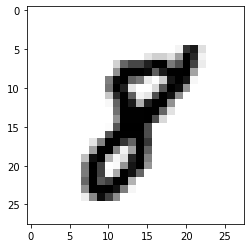

In [5]:
# Visualization
import matplotlib.pyplot as plt

plt.imshow(x_train[17], cmap=plt.cm.binary)
plt.show()

In [6]:
print(y_train[17])

8


In [7]:
# Normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

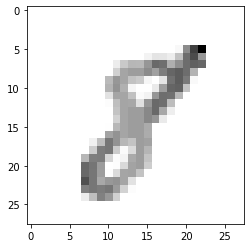

In [9]:
# Visualization
import matplotlib.pyplot as plt

plt.imshow(x_train[17], cmap=plt.cm.binary)
plt.show()

In [10]:
print(y_train[17])

8


In [11]:
# Create model
model = tf.keras.models.Sequential()

2021-12-30 23:52:36.448118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-30 23:52:36.448149: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-30 23:52:36.448174: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (linux): /proc/driver/nvidia/version does not exist
2021-12-30 23:52:36.448432: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Input into 1*784
model.add(tf.keras.layers.Flatten())

In [13]:
# Adding few layers
model.add(tf.keras.layers.Dense(128,  activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(128,  activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,  activation=tf.nn.relu))



In [14]:
# Output layer
model.add(tf.keras.layers.Dense(10,  activation=tf.nn.softmax))


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [16]:
model.fit(x_train, y_train, epochs=3)

2021-12-30 23:52:36.542917: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2477 - accuracy: 0.9255
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1049 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0740 - accuracy: 0.9768


In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9715


In [18]:
predictions = model.predict(x_test)

In [22]:
import numpy as np
print(np.argmax(predictions[7]))

9


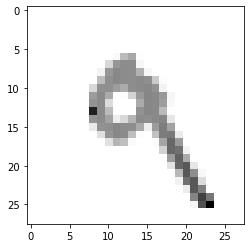

In [23]:
plt.imshow(x_test[7], cmap=plt.cm.binary)
plt.show()